# EOS 491 // EOS 518: Assignment 1.3


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.sparse import diags
from tqdm import tqdm
from IPython.display import Image

def difusse_flux(h, dt, dx, bcond, K, tmax, flux, sea_level=None,
    plot_every=200, legend=False, i=None, plot_frame = None,
    title = None):
    #set Crank-Nicholson solution matices
    r = (K*dt)/(2*dx**2)
    B = diags([r, 1-2*r, r], [-1, 0, 1], shape=(1000, 1000)).toarray()
    A = diags([-r, 1+2*r, -r], [-1, 0, 1], shape=(1000, 1000)).toarray()
    invA = np.linalg.inv(A)

    #set boundary conditions
    boundary_vector = np.zeros(1000)
    boundary_vector[0] = bcond[0]
    boundary_vector[-1] = bcond[-1]
    b = 2*r * boundary_vector

    #calculate solution for tmax time steps
    time = np.arange(0, tmax, dt)
    if sea_level is not None:
        sea_level = list(map(sea_level, time)) 

    tmax = int(tmax / dt +1)
    data = pd.DataFrame()
    for t in tqdm(range(1, tmax)):
        #find the point where topography is less than sea_level
        index = i or np.where(h < sea_level[t -1])[0][0]
        #introduce the sea_level
        if isinstance(flux, (list, tuple, np.ndarray)):
            h[index] += flux[t] * dt / dx
        else:
            h[index] += flux* dt / dx

        #solve equations
        h = invA.dot((B.dot(h) + b))

        #make plots
        if t * dt % plot_every == 0: 
            plt.plot(h, 'k', label=str(t*dt) + ' years')
        if title:
            plt.title(title)
        if plot_frame:
            plt.axis(plot_frame)
        
        #save_data
        data[t] = h        
    
    plt.xlabel('Distance (m)')
    plt.ylabel('Altitude (m)')
    if legend:
        plt.legend();
    #return data, time

__Question 1__

(a) (2 points) Thinking in terms of depositional settings (e.g., alluvial fan, deep marine, etc.),
describe the different environments encountered as you move from point 200 to point 700
on the year 1,040 (red) line.


__Answer:__

- At points 200 and 300 the sediments are deposited above the sea level, so the depositional environment could be a terrestrial alluvial fan. In this environment the sediments transported by a river are deposited in a continental setting. It could also be a transitional deltaic environment where the sediments are doposited in the mouth of the river.
- At point 400 the sediments start to be deposited below the sea level, but not at great depths, so they could encounter a shallow marine environment.
- Then as we continue going to point 700, the sediments are deposited at greater depths, so they encounter a deep marine environment.

(b) (2 points) It turns out that the development of a flat shelf is very common feature in
model runs such as these. Why does a flat shelf invariably develop? Hint: run a model
experiment where your initial topography is flat or essentially flat, as opposed to an angled slope as in question 1.2.2. If you do this, keep constant the x-point where sediment is added in every time step (say, always add at the 500th x-grid point).


__Answer:__

The experiment suggested in the hint gives the following result:

100%|██████████| 2000/2000 [00:04<00:00, 406.96it/s]


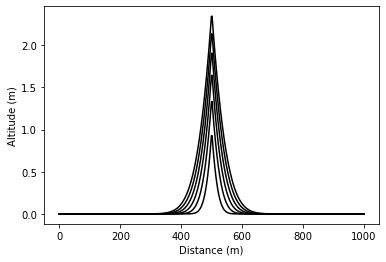

In [119]:
h= np.zeros(1000)
difusse_flux(h, dt=0.5, dx=10, bcond=[0,0], K=200,
    tmax=1000, flux=2, plot_every=150, legend=False, i=500)

This plot shows that in a flat surface, the sediments are distributed uniformily around the point where the flux is introduced. Now, let's perform the same experiment in an inclined topography:

100%|██████████| 2000/2000 [00:05<00:00, 373.47it/s]


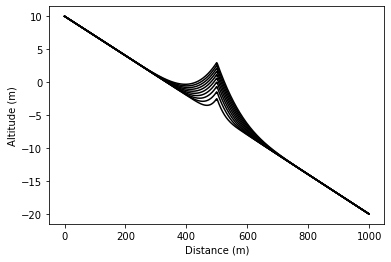

In [32]:
x = np.arange(0, 10000, 10)
h = -(3 /1000) * x + 10

difusse_flux(h, dt=0.5, dx=10, bcond=[10,-20], K=500, tmax=1000,
    flux=10, plot_every=100, legend=False, i=500)

In this plot the distribution of the sediments is no longer simetric because there is more accommodation space down the slope, so the sediments tend to be more extended downward. When we have a horizontal flow instead of a vertical flow, the flat surface arises because we do not vary the point at which the flux is being added horizontally, If we were to vary this point, the flat surface would not form. This could be due to the fact the accommodation space increases down the slope, and the sediments are distributed uniformly.  

(c) (3 points) For a given diffusivity, demonstrate how variations in sediment flux can lead to
a prograding, aggrading and retrograding shoreline. Use the same sea level history for each
experiment. Make a plot for each scenario (three total), as well as providing the model
parameters used. In each plot, height will be on the y-axis and distance will be on the
x-axis (like in Figure 1). Plot enough topographic lines at different time steps to clearly
show the temporal trend in the shoreline (retrogradation, aggradation and progradation).


__Answer:__

For this question I will use a sea level that starts at 0m and rises to 5m in 1000 years:

In [97]:
sea_level = lambda t: 5 * t / 1000

I will also use an initial inclined topography. For this sea level history, retrogradation arises when he have low values of sediment flux. For example, for a flux of $5 m^2 / y$ we obtain the following plot:

100%|██████████| 10000/10000 [00:34<00:00, 293.49it/s]


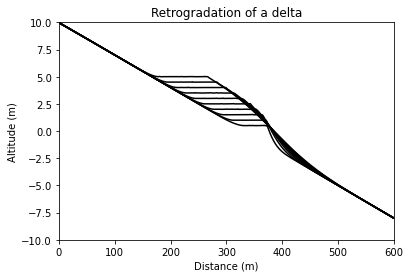

In [111]:
difusse_flux(h, dt=0.1, dx=10, bcond=[10,-20],
    K=200, tmax=1000, flux=5, sea_level=sea_level,
    plot_every=100, legend=False, plot_frame=[0,600,-10,10],
    title = 'Retrogradation of a delta')

This plot shows that the front of the delta moves landward. All the parameters are specified in the difuse flux function.

Aggradation occurs for intermediate levels of sediment flux. For example, for a flux of $15 m^2 / y$ we obtain: 

100%|██████████| 10000/10000 [00:33<00:00, 295.55it/s]


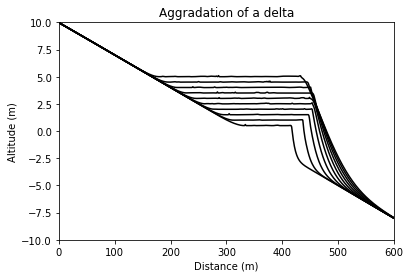

In [118]:
difusse_flux(h, dt=0.1, dx=10, bcond=[10,-20],
    K=200, tmax=1000, flux=15, sea_level=sea_level,
    plot_every=100, legend=False, plot_frame=[0,600,-10,10],
    title = 'Aggradation of a delta')

This plot shows that the front of the delta moves forward at first, but then it move back, so overall the front does not move. However, there was in increase in land elevation due to sediment deposition.

Finally, progradation occurs for high values of sediment flux. For example, for a sediment flux of $30 m^2 / y$ we obtain:

100%|██████████| 20000/20000 [01:10<00:00, 281.75it/s]


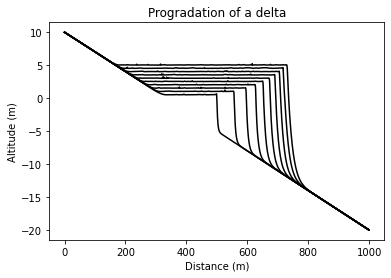

In [117]:
difusse_flux(h, dt=0.05, dx=10, bcond=[10,-20],
    K=200, tmax=1000, flux=50, sea_level=sea_level,
    plot_every=100, legend=False,
    title = 'Progradation of a delta')

This plot shows that the delta front moves basinward over time, so the delta is prograding.

**Question 2 (13)**


In [2]:
import csv
#empty lists for data
model_time=[]
model_topo=[]
#open the data file
with open("model_results.csv","r") as fid:
  data = csv.reader(fid, delimiter=",")
  #reads the data in line-by-line
  for row in data:
    model_time.append(float(row[0]))
    model_topo.append([float(r) for r in row[1:]])

(a) (3 points) Make a plot of the horizontal position of the shoreline (on the y-axis) versus
time (on the x-axis). What does the temporal trend of the shoreline tell you about the
sea level history used to produce this model? Hint: there is no set way to determine
the shoreline, so you will need to experiment. The function numpy.gradient might be
helpful. When you have a method that you think is working, check it visually - i.e., plot the
topography for a handful of times, and estimate where the shoreline is by eye. How does this manual determination compare with your programmatic determination for shoreline
location?




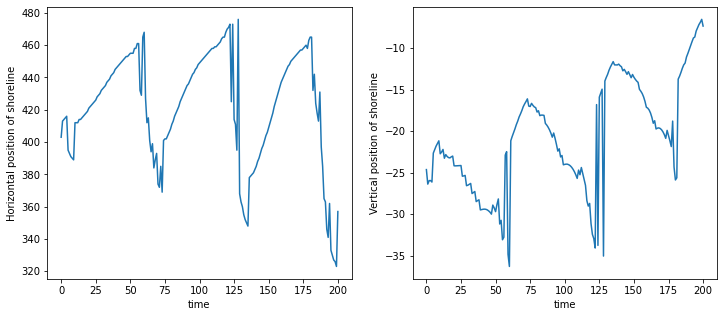

In [4]:
shore_line_y = []
shore_line_x = []
for topo in model_topo[1:]:
    curv = np.gradient(np.gradient(topo))
    max_curv = np.max(curv)
    shore_line_y.append(topo[np.where(curv == max_curv)[0][0]])
    shore_line_x.append(np.where(curv == max_curv)[0][0])

fig, axs = plt.subplots(1,2, figsize= (12,5))
plt.sca(axs[0])
plt.plot(shore_line_x)
plt.xlabel('time')
plt.ylabel('Horizontal position of shoreline')

plt.sca(axs[1])
plt.plot(shore_line_y);
plt.xlabel('time')
plt.ylabel('Vertical position of shoreline');



The horizontal and vertical changes of the shoreline with time tell us that the sea level had some oscillations with probably 3 cycles.

(b) (1 point) Base on the position of the coastline at the beginning and end of the model run,
what was the direction and total amount of sea level change in this simulation?


The horizontal position of the shoreline moved landward, and the vertical position moved up. We can find the exact values by subtracting the last and first positions of the shoreline:

In [13]:
dx = shore_line_x[-1] - shore_line_x[0]
dy = shore_line_y[-1] - shore_line_y[0]
print(f'The horizontal position of the shoreline moved {dx} units landward')
print(f'The vertical position of the shoreline moved {dy} units up')

The horizontal position of the shoreline moved -46 units landward
The vertical position of the shoreline moved 17.31 units up


(c) (2 points) For regions of the x-grid that accumulated sediment (so final topography - initial
topography is >0), what is the mean value and variability of total NET accumulation of
sediment? Show this distribution as a histogram plot (see https://www.datacamp.com/community/tutorials/histograms-matplotlib if you want a refresher on histograms,
or how to make them in Python). How does this distribution compare to the total sea
level change you determined in question 2b?


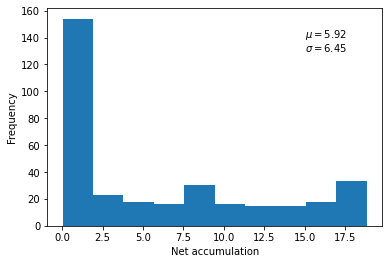

In [20]:
topo_diff = np.array(model_topo[-1]) - np.array(model_topo[0])
net = topo_diff[np.where(topo_diff > 0)[0]]
plt.hist(net, bins=10)
plt.text(15, 140, f'$\mu = {round(np.mean(net), 2)}$')
plt.text(15, 130, f'$\sigma = {round(np.std(net),2)}$')
plt.ylabel('Frequency')
plt.xlabel('Net accumulation');

This histogram shows a very left skewed distribution with a mean of 5.92 and a standard deviation of 6.65. The distribution shows that the majority of points had little net accumulation. In the last question I calculated that th sea level rose 17.31 units up. Compared to the distribution, this is a very extreme value, almost two standard deviations away from the mean.

(d) (3 points) For each the grid point that accumulated sediment, what percent of the total
elapsed model time is represented by NET sedimentation (i.e., a gain in height that was
not later lost to erosion) versus hiatus or erosion? Make a plot to show this result, with
the x-axis being the x-grid position where sediment accumulated and the y-axis being
the percent of total time represented by net sedimentation. Where is the most complete
sedimentary rock record (i.e., where the most time is represented by rock), and where are
there the most gaps? Hint: examine and think about Figure 2 before starting this task.


In [108]:
def erase_erosion(section):
    net=np.flipud(section)
    for i in range(len(net)-1):
        if net[i+1] > net[i]:
            net[i+1]=net[i]
    return np.flipud(net)

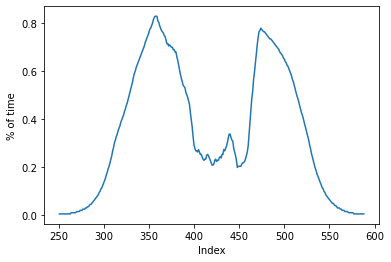

In [111]:
idx_acum = np.where(topo_diff > 0)[0]

pct = []
for idx in idx_acum:
    section = [t[idx] for t in model_topo]
    section = erase_erosion(section)
    p=0
    for i in range(len(section) -1):
        if section[i+1] > section[i]:
            p+=1
    pct.append(p / len(model_topo))

plt.plot(idx_acum, pct)
plt.xlabel('Index')
plt.ylabel('% of time');

There are two points where the percentage of time representing most accumulation is the greatest: around 350 and 470. Also the points with most gaps is where this percentage is the lowest. At first I thought that it would be on the first and last points, around 250 and 600, but maybe this values are low just because there was very little accumulation. That is why I think that the value with mos gaps must be the one around 400 and 450, I think that this minimum was caused by erosion and not by low accumulation.

(e) (1 point) For the grid points where the net accumulation of sediment is relatively high (at
least ≥10 meters of topography gain), calculate the apparent sediment accumulation rate
by dividing the total NET thickness by total time elapsed.


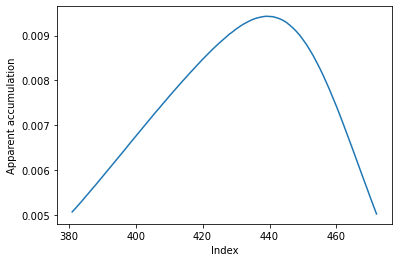

In [185]:
high_net_acum = np.where(topo_diff >= 10)[0]
time = model_time[-1]
apparent_acum = topo_diff[high_net_acum] / time

plt.plot(high_net_acum, apparent_acum)
plt.xlabel('Index')
plt.ylabel('Apparent accumulation');

(f) (3 points) Now calculate apparent sedimentation rates with a moving window moving up
through your selected sections (say, in 3 meter thick intervals throughout each section).
How do these calculated sedimentation rates compare to your single “full section” determi-
nations? Take the base 10 logarithm of the sedimentation rates determined in (e) and (f),
and plot the distribution of these log-transformed values as a histogram (e.g., the latter in
red bars, and the former in blue, so they can be easily distinguished)

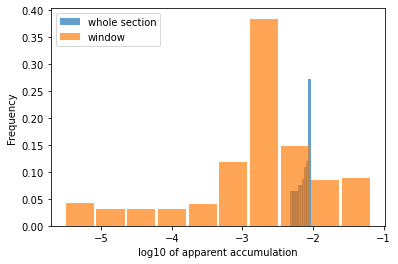

In [205]:
def get_windows(section, window_lenght):
    limits = np.arange(section[0], section[-1] + window_lenght, window_lenght)
    pair_limits = [(x,y) for x,y in zip(limits[:-1], limits[1:])]
    windows = []
    for pair in pair_limits:
        w = []
        for point in section:
            if point >= pair[0] and point < pair[1]:
                w.append(point)
            if point > pair[1]:
               break
        windows.append(w)
    return windows

def get_window_apparent_accum(idx_acum, window_lenght):
    accum = []
    for idx in idx_acum:
        section = [t[idx] for t in model_topo]
        section = erase_erosion(section)
        windows  = get_windows(section, window_lenght)
        for window in windows:
            apparent_accum = (window[-1] - window[0]) / (10 * len(window))
            accum.append(apparent_accum)
    accum = np.delete(accum, np.where(np.log10(accum) == -np.inf))
    return accum
    
apparent_acum_window = get_window_apparent_accum(idx_acum, 3)
hist1, edges1 = np.histogram(np.log10(apparent_acum), 10)
hist2, edges2 = np.histogram(np.log10(apparent_acum_window), 10)

freq1 = hist1/float(hist1.sum())
freq2 = hist2/float(hist2.sum())
plt.bar(edges1[:-1], freq1, width = 0.05 ,alpha=0.7, label='whole section')
plt.bar(edges2[:-1], freq2, width = 0.4 ,alpha=0.7, label='window')
plt.ylabel('Frequency')
plt.xlabel('log10 of apparent accumulation')
plt.legend();

This plot shows that the apparent accumulation is more variable when we calculate it in a window. Also, it is more common to have lower values of apparent accumulation when we make the calculation in a window.

__Question 3__

a) (3 points)  Document your observations about vertical and lateral trends in depositional environments, and lateral trends in the total column thickness.

- The total column thickness increases with distance into the basin, it reaches a maximum at 5.7km, and then it starts to decrease.
- The terrestrial depositional environments are more common at the beginig and at the end of the basin. The depth of these environments increases with distance into the basin.
- The intertidal environments grow in number and thickness with distance, but they decrease in the final part of the basin both in number and thickness. The same occurs with the environments with depositional depth >0.5m, >2.5, and >0.5m
- The flooding surfaces increase with distance into the basin, they reach a maximum at around 6km, and then they start to decrease.
- The environments with depositional depth >10m are present at the bottom of in all the columns. They increase in number as distance increases into the basin.



b) (3 points)  Where do you think the edge of the delta is today? Describe the accommodation space landward and basinward from this point.

- I think that the edge of the delta is at the top of kilometer 5 because this is the point where the furthest top shallow sediments are. Also, the fact that the column thickness is high at this point supports this idea because in the model experiment we saw in class, the delta front is where the thickest column is.
- Accommodation space increases basinward and decreases landward. This is because usually depth increases basinward, so there is more space available to fill in this direction.

(c)  (3 points)  Identifyflooding surfaces in each core.  A flooding surfaceis defined as a sharpcontact  that  separates  overlying  younger  strata  with  deep-water  facies  from  underlyingolder strata with shallow-water facies).

I highlighted the flooding surfaces that I found with a square in the image below:

In [212]:
Image(url= "images/strat_data_fs.png")

(d)  (3 points)  To the best of your ability,  correlate the flooding surfaces across each strati-graphic column.  You will be unable to correlate all of the surfaces into all of the cores.Why?

I correlated seven flooding surfaces, as showed in the image below. I was not able to correlate all surfaces because sea level might have not rose and lowered in equal amounts. Thus, some columns show flooding surfaces that do not appear in other columns.

In [3]:
Image(url= "images/correlation.png")

e)  (3 points)  For each correlated flooding surface,  estimate the sea level change associatedwith that surface.

For this question I assumed that the height difference between the lowest and the highest point of a correlated flooding surface, can be used as an approximation of the sea level change. With this method I obtained the following estimations:

| Surface        | Sea level     | 
| :------------- | :----------: | 
|  1             | 200m   |
|  2             | 5m | 
|  3             | 5m | 
|  4             | 5m | 
|  5             | 100m | 
|  6             | 50m | 
|  7             | ? | 

This method depends on the correct correlation of flooding surfaces, so if the last question was wrong this will be wrong too.

In [4]:
Image(url= "images/sea_level.png")

(f)  (3 points)  Is sea level in the basin higher today than 400 kya?  If so, by how much?

I think that the shoreline today is located at the top of kilometer five. To see if the sea level is higher today than 400kya we have to know where was the shoreline at that time. I think that 400ky ago, the shoreline was at the begining of the first correlated flooding surface. This is because this surface represents the older sea level rise event, and the shoreline must have been located at the furthest basinward point representing this event.

The difference in depth between these two points can be used as an estimation of the total amount of sea level change. As shown in the figure below, this difference is approximately 160 meters.

In [5]:
Image(url= "images/total_sea_level.png")

(g)  (6 points)  Describe the history of sea level in this basin (the number of changes, and themagnitude  of  each  change).   Use  your  observations  documented  above  to  support  yourarguments.(Hint:  you can use your model as a sanity-check)

If the correlation of flooding surfaces obtained in question d) is correct, the sea level must have rose 7 times. Thus there was probably 7 cycles of sea level change and fall. Now, if the estimated amount of sea level change for each flooding surface is correct, the seven cycles must have had very different amplitudes. Taking this estimates as the amplitud of sea level change, the sea level change history could have been something like the figure below.

In [6]:
Image(url= "images/sea_level_hist.png")